## Linear Regression 2


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
olympics100m = np.asarray([1900,11,
1904,11,
1906,11.2,
1908,10.8,
1912,10.8,
1920,10.8,
1924,10.6,
1928,10.8,
1932,10.3,
1936,10.3,
1948,10.3,
1952,10.4,
1956,10.5,
1960,10.2,
1964,10,
1968,9.95,
1972,10.14,
1976,10.06,
1980,10.25,
1984,9.99,
1988,9.92,
1992,9.96,
1996,9.84,
2000,9.87,
2004,9.85,
2008,9.69,
2012,9.63,
2016,9.81]);

# women's 100m sprint times
olympics100f=np.asarray([
1948, 11.90,
1952, 11.50,
1956, 11.50,
1960, 11.00,
1964, 11.40,
1968, 11.08,
1972, 11.07,
1976, 11.08,
1980, 11.06,
1984, 10.97,
1988, 10.54,
1992, 10.82,
1996, 10.94,
2000, 10.75,
2004, 10.93,
2008, 10.78,
2012, 10.75,
2016, 10.71])

In [3]:

def get_training_data():
    size_m = olympics100m.shape
    size_f = olympics100f.shape

    Xtrainm = np.zeros([int(size_m[0]/2)])
    ytrainm = np.zeros([int(size_m[0]/2)])

    Xtrainf = np.zeros([int(size_f[0]/2)])
    ytrainf = np.zeros([int(size_f[0]/2)])

    even_idx = 1
    odd_idx = 0;
    for i in range(int(size_m[0])):

        if i==0:
            Xtrainm[i] = olympics100m[i]
        elif i%2==0:
            Xtrainm[even_idx] = olympics100m[i]
            even_idx = even_idx + 1
        else:
            ytrainm[odd_idx] = olympics100m[i]
            odd_idx = odd_idx + 1

    even_idx = 1
    odd_idx = 0;

    for i in range(int(size_f[0])):
        if i==0:
            Xtrainf[i] = olympics100f[i]
        elif i%2==0:
            Xtrainf[even_idx] = olympics100f[i]
            even_idx = even_idx + 1
        else:

            ytrainf[odd_idx] = olympics100f[i]
            odd_idx = odd_idx + 1
    return Xtrainm, ytrainm, Xtrainf, ytrainf

In [4]:
Xtrainm, ytrainm, Xtrainf, ytrainf = get_training_data()

In [5]:
def simple_func(X):
    return 3*X+1

def poly_rbf(j, X):
    return X**j

def gaus_rbf(X, mean, std=1):
    return np.exp(-0.5*((X-mean)/std)**2)

In [6]:
X = np.linspace(0,10,20)

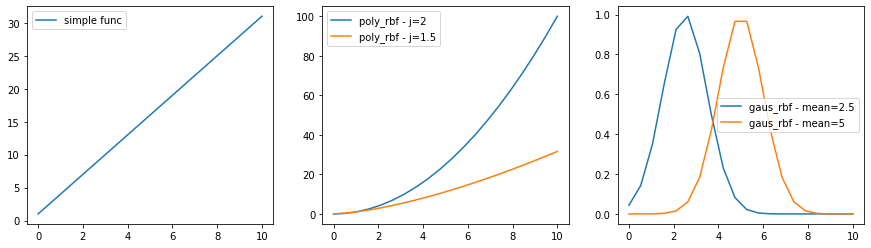

In [7]:
fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3)
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
for xi in X:
    y1.append(simple_func(xi))
    y2.append(poly_rbf(2, xi))
    y3.append(gaus_rbf(xi, 2.5))
    y4.append(gaus_rbf(xi,5.0))
    y5.append(poly_rbf(1.5, xi))

ax[0].plot(X, np.array(y1), label='simple func')
ax[1].plot(X, np.array(y2), label='poly_rbf - j=2')
ax[1].plot(X, np.array(y5), label='poly_rbf - j=1.5')
ax[2].plot(X, y3, label='gaus_rbf - mean=2.5')
ax[2].plot(X, y4, label='gaus_rbf - mean=5')

ax[0].legend()
ax[1].legend()
ax[2].legend()

In [8]:
def sin_func(X): 
    return 3*np.sin(X) + 0.5*np.random.normal()

import scipy.special as sp
def new_function(x):
    return 2.0+4*sp.airy(15*x)[0]-5*sp.jv(1,18*x)+0.2*np.random.normal()

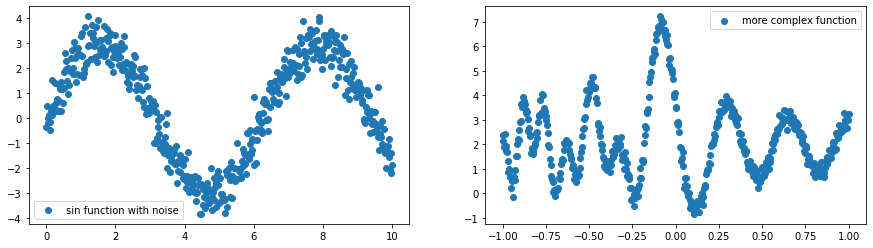

In [9]:
N = 501
P = 15

def Generate_data(N):
    Y_sin = []
    Y_special = []
    X_special = np.linspace(-1,1,N)
    X_sin = np.linspace(0,10,N)
    
    
    for x in X_special:
        Y_special.append(new_function(x))
    for x in X_sin:
        Y_sin.append(sin_func(x))
    
    return Y_sin, Y_special, X_sin, X_special

Y_sin, Y_special, X_sin, X_special = Generate_data(N)

fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=2)
ax[0].scatter(X_sin, Y_sin, label='sin function with noise')
ax[1].scatter(X_special, Y_special, label='more complex function')
ax[0].legend()
ax[1].legend()



In [10]:
np.stack([np.zeros(3)] + [np.ones(3)], axis=0)


array([[0., 0., 0.],
       [1., 1., 1.]])

In [11]:
np.stack([np.zeros(3)] + [np.ones(3)], axis=-1)

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [12]:
def rbf(x, loc, scale):
    return np.exp(-0.5 * (x - loc) ** 2 / scale ** 2)

In [13]:
def rbf_design_mat(x, scale):
    return np.stack([np.ones(x.shape)] + \
    [rbf(x, loc/2, scale) for loc in range(P)], axis=-1)

def poly_design_mat(x):
    return np.stack([np.ones(x.shape)] + \
    [poly_rbf(x, j) for j in range(P)], axis=-1)


In [14]:
A = poly_design_mat(X_sin)
A.shape

(501, 16)

In [15]:
def get_best_weights(A, Y):
    inner = np.matmul(A.T, A) + np.identity(P+1)
    outer = np.matmul(A.T, np.array(Y))
    return np.matmul(np.linalg.inv(inner), outer)

In [16]:
W = get_best_weights(A, Y_sin)

In [17]:
def predict(A, W):
    return np.matmul(A, W)

In [18]:
Y_hat = predict(A, W)

print(A.shape, W.shape)

(501, 16) (16,)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

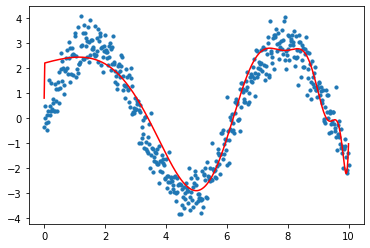

In [19]:
plt.scatter(X_sin, Y_sin, s=10)
plt.plot(X_sin, Y_hat, c='r')
plt.plot


In [20]:
def Generate_polynomial_plots():
    Y_sin, Y_special, X_sin, X_special = Generate_data(N)
    P = 2
    A1 = poly_design_mat(X_sin)
    P = 5
    A2 = poly_design_mat(X_sin)
    P = 20
    A3 = poly_design_mat(X_sin)
    W1 = get_best_weights(A1, Y_sin)
    W2 = get_best_weights(A2, Y_sin)
    W3 = get_best_weights(A3, Y_sin)
    Yhat_1 = predict(A1, W1)
    Yhat_2 = predict(A2, W2)
    Yhat_3 = predict(A3, W3)
    return Yhat_1, Yhat_2, Yhat_3, Y_sin, X_sin
    

In [21]:
Yhat_1, Yhat_2, Yhat_3, Y_sin, X_sin = Generate_polynomial_plots()

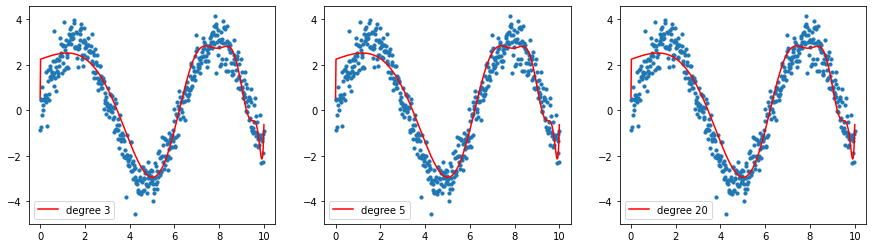

In [22]:
fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3)
ax[0].scatter(X_sin, Y_sin, s=10)
ax[1].scatter(X_sin, Y_sin, s=10)
ax[2].scatter(X_sin, Y_sin, s=10)
ax[0].plot(X_sin, Yhat_1, c='r', label='degree 3')
ax[1].plot(X_sin, Yhat_2, c='r', label='degree 5')
ax[2].plot(X_sin, Yhat_3, c='r', label='degree 20')
ax[0].legend()
ax[1].legend()
ax[2].legend()



In [33]:
def Generate_polynomial_plots():
    Y_sin, Y_special, X_sin, X_special = Generate_data(N)
    P = 2
    A1 = rbf_design_mat(X_sin,0.1)
    P = 5
    A2 = rbf_design_mat(X_sin,2.0)
    P = 20
    A3 = rbf_design_mat(X_sin,10.0)
    W1 = get_best_weights(A1, Y_sin)
    W2 = get_best_weights(A2, Y_sin)
    W3 = get_best_weights(A3, Y_sin)
    Yhat_1 = predict(A1, W1)
    Yhat_2 = predict(A2, W2)
    Yhat_3 = predict(A3, W3)
    return Yhat_1, Yhat_2, Yhat_3, Y_sin, X_sin

In [34]:
Yhat_1, Yhat_2, Yhat_3, Y_sin, X_sin = Generate_polynomial_plots()

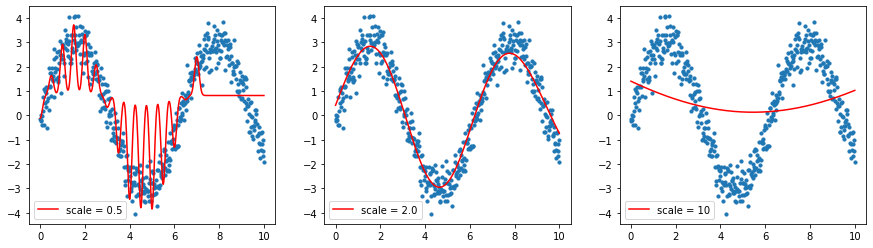

In [35]:
fig, ax = plt.subplots(figsize=(15,4), nrows=1, ncols=3)
ax[0].scatter(X_sin, Y_sin, s=10)
ax[1].scatter(X_sin, Y_sin, s=10)
ax[2].scatter(X_sin, Y_sin, s=10)
ax[0].plot(X_sin, Yhat_1, c='r', label='scale = 0.5')
ax[1].plot(X_sin, Yhat_2, c='r', label='scale = 2.0')
ax[2].plot(X_sin, Yhat_3, c='r', label='scale = 10')
ax[0].legend()
ax[1].legend()
ax[2].legend()
